# Machin Learning with Python

Machine Learning (ML) is a field where we attempt to teach computers to do complex tasks. How do you define a task though? We use computers for a lot of different things, as such we can also teach them to do a lot of different things. Some examples include:
- Image Recognition - you have probably used your smartphone to take a picture, but how does it detect faces in pictures? That is done via ML and some more interesting examples nowadays include detecting objects in autonomous cars (It is a bit scary in all fairness)

<img src="https://miro.medium.com/max/1028/1*MnbUSSXG1IDS9mXC0H8cKQ.png" alt="drawing" width="400"/>


- Speech Recognition - have you ever used Alexa, Siri or Google Assistant? Well all of them are based on ML - computers learning to understand our speech
- Medical diagnosis - ML can help with diagnosis of diseases. For example, if you take a CT scan of a patient's brain, you can then put the image through a ML algorithm which can tell you if the patient has a brain tumor.
- and much more...

In this notebook we will use the package `sklearn` to do some basic machine learning. Namely, we will make a teach a computer to recognise handwritten digits and predict house prices.

# 1. Linear Regression
Let's kick-off with the **Linear regression**. It is an *supervised method* which tries to predict never-before seen data based on data it has seen before.

A simple example would be: Imagine you are budgeting for renting a flat around George Square in Edinburgh but you don't know how much it might cost. Luckily, you have a couple of frinds who live in that area and you ask them how much they are paying based on how many bedrooms they have
- friend A has 1 bedroom and is paying £560
- friend B has 3 bedroom and is paying £1200
- friend C has 1 bedroom and is paying £540

Based on that, you can find how much you expect to be paying for a 2 bedroom flat by simply averaging the price of a bedroom in that area.

$$ \dfrac{A + B + C}{Num. of bedrooms} $$


$$ = \dfrac{560 + 1200 + 540}{5} $$


$$ = £460 $$

Therefore you should expect to be paying 2x460 = £920 for a 2 bedroom flat

You just performed *regression* there. You predicted how much a 2-bedroom flat might cost to rent in the future based on data you have from the past.

Now let's see how we can do that in Python. For that we will be using the package `sklearn`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we need to insert the data we just defined above

Text(0,0.5,'Price of flat')

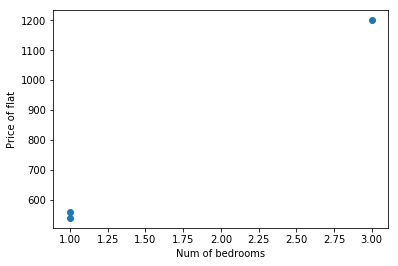

In [2]:
price = np.array([[560], [1200], [540]])
bedrooms = np.array([[1], [3], [1]])
plt.scatter(bedrooms, price)
plt.xlabel("Num of bedrooms")
plt.ylabel("Price of flat")

Now we want to fit a linear regression through it which will predict how much flats will cost to rent.

First we have to define the model. You can treat the model as the container for your Linear Regression and all of its parameters. Then we will fit it to the data

In [3]:
from sklearn.linear_model import LinearRegression

# Create the model
linreg = LinearRegression()

# Learn to predict
linreg.fit(bedrooms, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let's predict how much flats with 1 to 6 bedrooms will cost. First we define the bedrooms we want in `bedrooms_prediction` and then we predict the prices of these flats with `linreg.predict()`

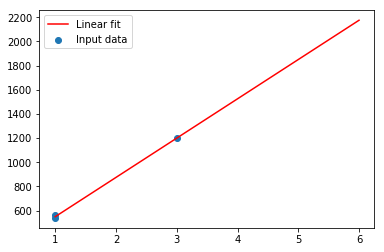

In [4]:
bedrooms_prediction = np.array([[1], [2], [3], [4], [5], [6]])
prices_prediction = linreg.predict(bedrooms_prediction)

# plot the results
fig = plt.figure()
plt.scatter(bedrooms, price, label="Input data")
plt.plot(bedrooms_prediction, prices_prediction, color="r", label="Linear fit")
plt.legend()
plt.show()

Huh, from the graph, you can see our initial esitmate was fairly correct. Now we can also see what the prices would be even for a 4 5 and 6 bedroom flat. £2000 is a lot of money for a flat!

This example is a fairly trivial one but imagine if you had a lot more information about the flats like number of bathrooms, floor, distance from closest shop, etc.. Then predicting by hand will become way more difficult but Linear Regression would perform just as well!

You will find out how well exactly in the next exercise!

## Exercise 1 - Linear regression for predicting house pricing  <a name="ex1"></a>
Here you will perform linear regression on a dataset of housing prices.

Let's first load the dataset `data/kc_house_data_min.csv`. It has the following columns:
- **price** in US dollars
- number of **bedrooms**
- number of **bathrooms**
- **sqft_living** - square feet of living space
- **sqft_lot** - square feet of the full house
- number of **floors**
- **waterfront** - 1 if there is one; 0 otherwise
- **view** - 1 if there is a nice view; 0 otherwise
- **condition** rating of the house from 1 to 5
- **grade** - overall grade given to the housing unit, based on King County grading system. From 1 to 13

In [5]:
data = np.loadtxt("data/kc_house_data_min.csv", delimiter=",", skiprows=1)
data.shape

OSError: data/kc_house_data_min.csv not found.

Now we want to seperate the data into the description of the houses and the predictions for them. In our case, we are trying to predict the house prices and all other columns are just the description of the houses. Seperate the data below:

In [ ]:
# [ENTER CODE IN THIS BLOCK]


#### CHECKING CODE # DON'T CHANGE ####
assert prices.shape == (21613,) , "Price variable has wrong shape"
assert descriptions.shape == (21613,9), "Descriptions variable has wrong shape"

Now you can just apply linear regression as it was shown in the example above!

In [ ]:
# [ENTER CODE IN THIS BLOCK]


OK, now let's see how good are our predictions! Create some arbatrary description of an imaginary house using the fields defined [earlier](#ndarray)! You can use `linreg.predict()` for that.

*Note: Data you input into the linear regression model must be of shape (1,9)!*

In [ ]:
# [ENTER CODE IN THIS BLOCK]
# Create a description of a house


In [ ]:
# [ENTER CODE IN THIS BLOCK]
# Predict it's price


# 2. Logistic regression

Logistic regression is in many ways similar to Linear regression. However, it's major difference is that it is a **classifying machine learning algorithm**. Instead of outputting a numerical prediction, **logistic regression outputs a label**. But wait, hold on, what is a label?

Imagine that you are driving a car - your goal is to reach your destination safely without causing any incidents. For that you need to look around as you are driving for other cars, pedestrians, roads, dogs, cats, and etc... Based on how you classify those objects, you take different actions. If you see a road you think to yourself "I should make sure I am driving on that" but if you see a pedestrian you think to yourself "Better try to not run over that person".

This is pretty much how autonomous cars work as well, but first they need to identify and classify objects on the road. Say that your machine learning algorithm can identify a [person, car, traffic light, handbag, backpack, truck], then you give it an image, it tries to identify objects and assign a label for each object. "Hey, you look like a human, I'll label you a `person`"

![](https://i.ytimg.com/vi/BNHJRRUKMa4/maxresdefault.jpg)

Logistic Regression is one of the ways you can achieve the above. Let's first have a look at a simple example

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs

# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=4)

# plot the data ointo classes
plt.scatter(X[y==0, 0], X[y==0, 1], label="Class 1")
plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 2")
plt.legend()

Here we can distinguish between 2 different classes via their colours. Now let's attempt to put learn a boundary between them and classify them

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

Pretty cool!

Now you have the chance to apply this to something a bit more practical!

## Exercise 2 - Logistic regression image classification

You task here is to make the computer learn how to classify hand-written digits.

First let's download our digits from the internet (it might take some time).

*Note: that we will be using only the first 5000 examples of images to make the exercise faster. You can use the full dataset but it might take >1h to train it.*

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# get data
X, y, _, _, _, _, _ = fetch_openml("mnist_784").values()

# reorder the data randomly
X, y = shuffle(X, y)

# Take only 5000 examples
X = X[:5000]
yy = y[:5000]

Let's now create a function that can visualise the data along with labels. This will also be used later

In [ ]:
def plot_digits(X, y):
    plt.rc("image", cmap="binary")
    nums = np.random.randint(0, len(X), 10)
    for idx, i in enumerate(nums):
        axs = plt.subplot(2,5,idx+1)
        plt.imshow(X[i].reshape(28,28), label="1")
        axs.set_title("Label: " + str(y[i]))
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()

In [ ]:
# X is the data you want to visualise
# y is the labels that will be displayed on top
plot_digits(X,y)

You have your data, you have a method of visualising it.

**Now apply Logistic Regression to the data!**
1. Initilise a LogisticRegression model
2. Train it on the data
3. Predict 10 examples (can be from the full dataset)
4. Plot the input images and their labels using `plot_digits()`

*Warning: Training might take up to 5 minutes, so be patient*

In [ ]:
# [ENTER CODE IN THIS BLOCK]
